In [1]:
# Langkah 1: Bersihkan dan Preproses Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Membaca dataset
df_bank = pd.read_csv('/content/bank-additional-full.csv', sep=';')

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
# Menghapus kolom 'duration' (sebagaimana dijelaskan dalam deskripsi dataset)
df_bank = df_bank.drop('duration', axis=1)

In [7]:
# Mengisi missing values di 'contact', 'pdays', dan 'poutcome' dengan modus
df_bank['contact'].fillna(df_bank['contact'].mode()[0], inplace=True)
df_bank['pdays'].fillna(df_bank['pdays'].mode()[0], inplace=True)
df_bank['poutcome'].fillna(df_bank['poutcome'].mode()[0], inplace=True)

In [8]:
# Langkah 2: Membangun Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:
# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
for col in categorical_cols:
    df_bank[col] = le.fit_transform(df_bank[col])

In [10]:
# Pisahkan features dan target
X = df_bank.drop('y', axis=1)
y = df_bank['y']

In [11]:
# Bagi data menjadi train dan test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Langkah 3: Bangun Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [13]:
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [14]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} - Accuracy: {accuracy:.2f}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Accuracy: 0.90
KNN - Accuracy: 0.88
SVM - Accuracy: 0.89
Naive Bayes - Accuracy: 0.83
Decision Tree - Accuracy: 0.83
Random Forest - Accuracy: 0.89


In [ ]:
# Langkah 4: Pilih Algoritma Terbaik
# Berdasarkan hasil di atas, model dengan akurasi tertinggi adalah Logistic Regression dengan akurasi 0.90.

In [19]:
# Langkah 5: Confusion Matrix
# Misalkan model terbaik adalah Random Forest
best_model = LogisticRegression()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ", conf_matrix)

Confusion Matrix:  [[7209   94]
 [ 755  180]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


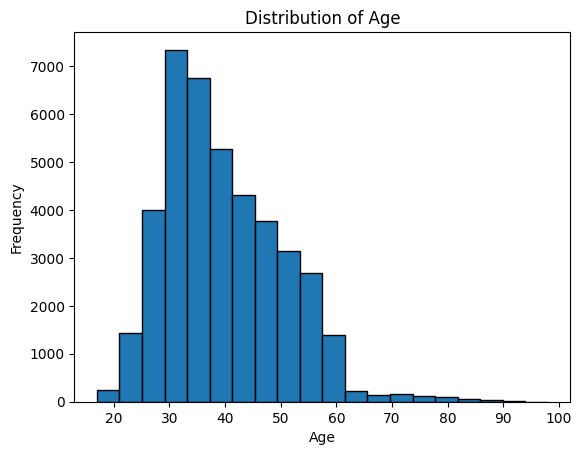

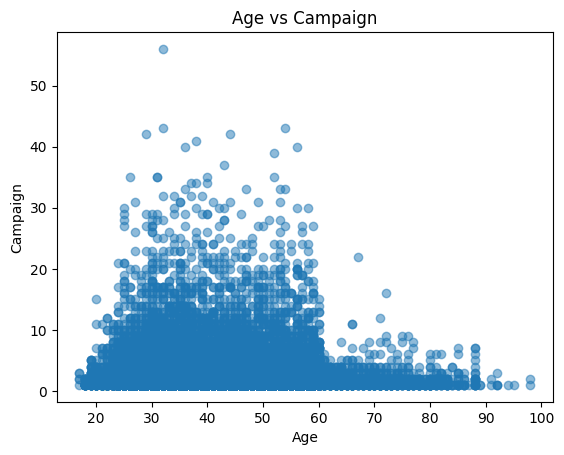

In [16]:
# Langkah 6: Analisis Data menggunakan Grafik
# Contoh plot
# Plot distribusi umur
plt.hist(df_bank['age'], bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

# Scatter plot untuk 'age' vs 'campaign'
plt.scatter(df_bank['age'], df_bank['campaign'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Campaign')
plt.title('Age vs Campaign')
plt.show()